In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('data_analyst_jobs_indeed_detailed.csv')

In [3]:
df.head()

,job_title,job_company,job_summary,job_desc
0,Entry Level IT Analyst,"Flexon Technologies IncPleasanton, CA 94588","$60,000 - $86,362 a year - Full-time",Responsibilities:\nWork hand-in-hand with the ...
1,Finance Data Analyst II,"Kimball Midwest191 reviewsColumbus, OH 43228Hy...",NaN,\n\n\nFinancial Data Analyst\n Kimball Midwest...
2,Medicaid Systems and Coding Analyst,"Spherion-Madison, WIMadison, WI 53703","Full-time, Temporary",\nSalary: Market related\n \nReference: S_1352...
3,"Analysts, all types - Military Exp a Plus",Corporate GrayMaryland,"$80,000 - $150,000 a year - Full-time",Many of our clients are seeking Analysts - and...
4,Research and Data Analyst,"E&E Co., Ltd.31 reviews45875 Northport Loop E,...",From $32 an hour - Full-time,RESPONSIBILITIES:\n· Execute daily ROI report ...


In [4]:
df['job_summary'] = df['job_summary'].fillna('No Content')

In [5]:
full = 0
temp = 0
number_y = []
number_h = []
for i in range(df.shape[0]):
    if df['job_summary'][i] is not 'No Content':
        if 'Full-time' in df['job_summary'][i]:
            full +=1
        if 'Temporary' in df['job_summary'][i]:
            temp +=1
        if 'year' in df['job_summary'][i]:
            number_y.append(re.findall(r'\d+', df['job_summary'][i].replace(',', '')))
        if 'hour' in df['job_summary'][i]:
            number_h.append(re.findall(r'\d+', df['job_summary'][i].replace(',', '')))

<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\dongj\AppData\Local\Temp\ipykernel_30512\1469323024.py:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if df['job_summary'][i] is not 'No Content':


In [6]:
full, temp

(482, 9)

In [7]:
year_price = [int(num) for sublist in number_y for num in sublist]

hour_price =[int(num) for sublist in number_h for num in sublist]

In [8]:
year_hour_price = [x * 1040 for x in hour_price]

In [9]:
import matplotlib.pyplot as plt

In [10]:
year_price.sort()
hour_price.sort()
year_hour_price.sort()

In [11]:
len(year_price), len(hour_price)

(642, 259)

Text(0.5, 1.0, 'Yearly income')

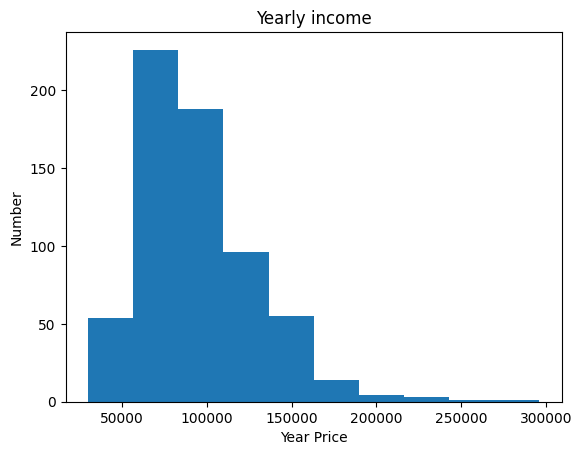

In [12]:
plt.hist(year_price)
plt.xlabel('Year Price')
plt.ylabel('Number')
plt.title('Yearly income')

Text(0.5, 1.0, 'Hourly income')

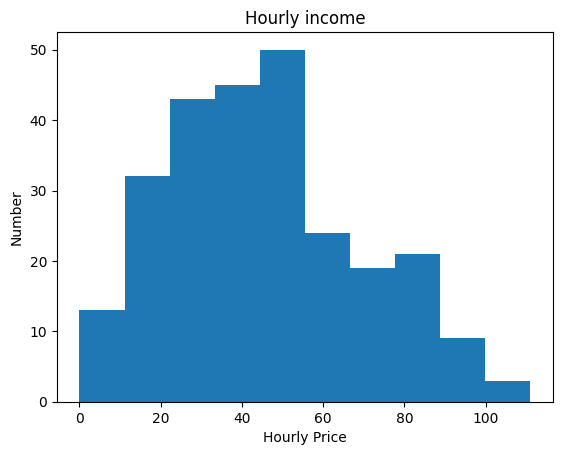

In [13]:
plt.hist(hour_price)
plt.xlabel('Hourly Price')
plt.ylabel('Number')
plt.title('Hourly income')

In [15]:
def payment(df, i):
    number_y = []
    number_h = []
    if df['job_summary'][i] != 'No Content':
        if 'year' in df['job_summary'][i]:
            number_y.append(re.findall(r'\d+', df['job_summary'][i].replace(',', ''))[0])
        if 'hour' in df['job_summary'][i]:
            number_h.append(re.findall(r'\d+', df['job_summary'][i].replace(',', ''))[0])
    return number_y, number_h

In [16]:
BS_Count =0
MS_Count =0
Doc_Count =0
BS_year_pay=[]
MS_year_pay=[]
Doc_year_pay=[]
for i in range(df.shape[0]):
    #tz = re.search(r'Qualification.*', df['job_desc'][i], re.DOTALL).group().strip()
    job_desc_words= df['job_desc'][i]
    if any(word in job_desc_words for word in ['BS', 'Bachelor','Bachelors', 'bachelor\'s']):
        BS_Count+=1
        BS_year_pay.append(payment(df, i))
    if any(word in job_desc_words for word in ['MS', 'Master', 'master', 'master\'s']):
        MS_Count+=1
        MS_year_pay.append(payment(df, i))
    if any(word in job_desc_words for word in ['PhD']):
        Doc_Count+=1
        Doc_year_pay.append(payment(df, i))

In [17]:
BS_result = []
for a, b in BS_year_pay:
    if a:
        BS_result.append(int(a[0]))
    if b:
        BS_result.append(int(b[0]) * 2080)
MS_result = []
for a, b in MS_year_pay:
    if a:
        MS_result.append(int(a[0]))
    if b:
        MS_result.append(int(b[0]) * 2080)
Doc_result = []
for a, b in Doc_year_pay:
    if a:
        Doc_result.append(int(a[0]))
    if b:
        Doc_result.append(int(b[0]) * 2080)

In [18]:
BS_result.sort()
MS_result.sort()
Doc_result.sort()

In [28]:
pyt, js, java, R, sql = 0,0,0,0,0
for i in range(df.shape[0]):
    job_desc_words= df['job_desc'][i]
    if any(word in job_desc_words for word in ['Python', 'python']):
        pyt+=1
    if any(word in job_desc_words for word in ['JS', 'JavaScript', 'javascript']):
        js+=1
    if any(word in job_desc_words for word in ['Java', 'java']):
        java+=1
    if any(word in job_desc_words for word in [' R ']):
        R+=1
    if any(word in job_desc_words for word in ['SQL', 'sql', 'MySQL', 'mysql', 'NoSQL']):
        sql+=1

In [30]:
tab, power, exc = 0,0,0
for i in range(df.shape[0]):
    job_desc_words= df['job_desc'][i]
    if any(word in job_desc_words for word in ['Tableau', 'tableau']):
        tab+=1
    if any(word in job_desc_words for word in ['Power BI', 'MS Power BI', 'PowerBI', 'powerbi']):
        power+=1
    if any(word in job_desc_words for word in ['Excel', 'excel']):
        exc+=1

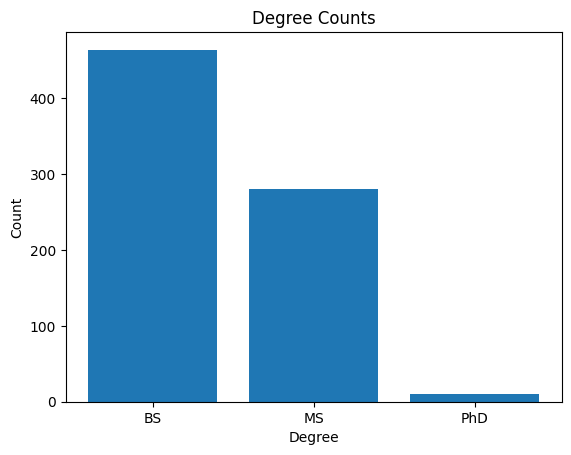

In [35]:
import matplotlib.pyplot as plt

# Data
degrees = ['BS', 'MS', 'PhD']
counts = [BS_Count, MS_Count, Doc_Count ]

# Create bar chart
plt.bar(degrees, counts)

# Add labels and title
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Counts')

# Show plot
plt.show()

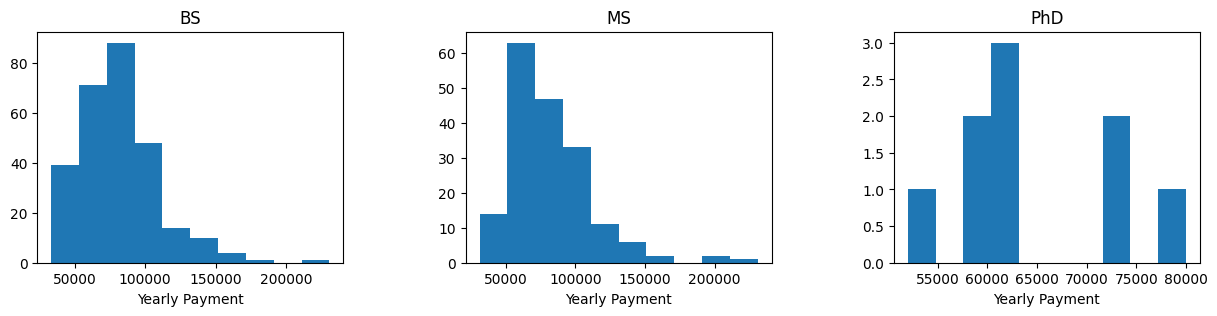

In [38]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 3))

# Plot data on each subplot
ax1.hist(BS_result)
ax2.hist(MS_result)
ax3.hist(Doc_result)

# Add titles to subplots
ax1.set_title('BS')
ax2.set_title('MS')
ax3.set_title('PhD')

ax1.set_xlabel('Yearly Payment')
ax2.set_xlabel('Yearly Payment')
ax3.set_xlabel('Yearly Payment')

fig.subplots_adjust(wspace=0.4)
# Show plot
plt.show()

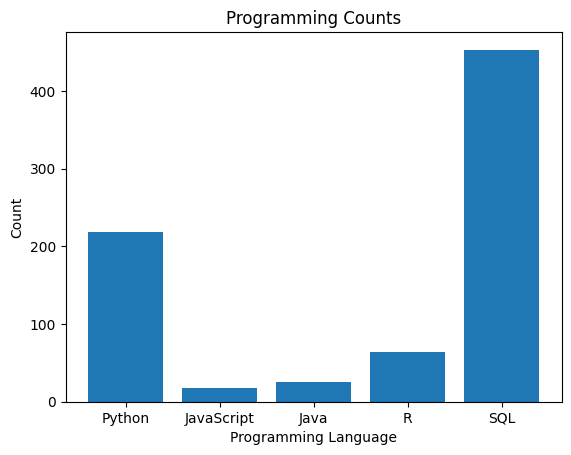

In [32]:
# Data
programmingLag = ['Python', 'JavaScript', 'Java', 'R', 'SQL']
counts = [pyt, js, java, R, sql]

# Create bar chart
plt.bar(programmingLag, counts)

# Add labels and title
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Programming Counts')

# Show plot
plt.show()

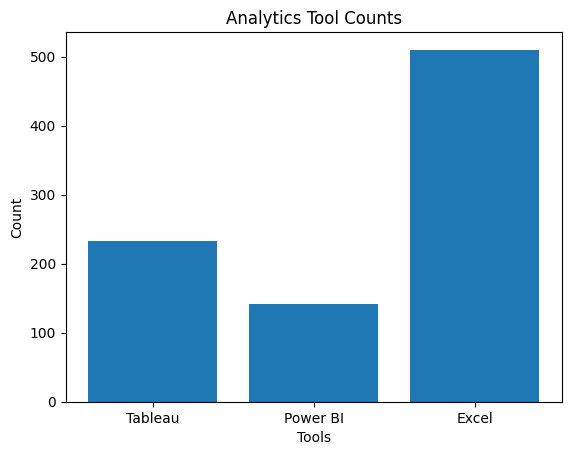

In [33]:
# Data
tools = ['Tableau', 'Power BI', 'Excel']
counts = [tab, power, exc]

# Create bar chart
plt.bar(tools, counts)

# Add labels and title
plt.xlabel('Tools')
plt.ylabel('Count')
plt.title('Analytics Tool Counts')

# Show plot
plt.show()